In [1]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [222]:
# LIURP File Import
#import liurp_fields
reload(liurp_fields)
colspecs = liurp_fields.colspecs
colnames = liurp_fields.colnames
liurp_raw = pd.read_fwf("CY2013/PGWLIURP2013.txt", colspecs=colspecs, header=None, names=colnames)
liurp_raw.iloc[:, 0:285].head()

,COMPANY,YEAR,CUSTNUM,ZIPCODE,COUNTY,MCD,SERTYPEB,CLASS,PREUSE1,PREUSE2,...,TOTBFR,TOTDCA,TOTOTHR,TERMPRE,BLANK,TERMPOS,PAYPRE,PAYPOST,PILOT,CONTRACT
0,76,2013,10061416,19141,101,5,1,1,37,68,...,M,M,M,NaN,M,M,M,M,4,1
1,76,2013,100840244,19119,101,5,1,1,94,26,...,M,M,M,NaN,M,M,489,1165,4,4
2,76,2013,100974493,19140,101,5,1,1,6,9,...,M,M,M,NaN,M,M,1513,1470,4,3
3,76,2013,101307042,19121,101,5,1,1,218,113,...,M,M,M,NaN,M,M,1452,1323,4,1
4,76,2013,102147829,19139,101,5,1,1,93,26,...,M,M,M,NaN,M,M,655,845,4,4


In [78]:
# look at savings from the LIURP field
colsel = ['CUSTNUM', 'ADJPRE', 'ADJPOST', ]
save = liurp[colsel]

# drop any that don't have a usage data and turn data in to floats
save = save[save.ADJPRE <> "M"]
save.ADJPOST = save.ADJPOST.map(float)
save.ADJPRE = save.ADJPRE.map(float)

# calculate the savings and both gross and %
save['adjsave'] = save.ADJPOST - tmp.ADJPRE
save['adjsaveper'] = save.adjsave / tmp.ADJPRE
save.describe()

,CUSTNUM,ADJPRE,ADJPOST,adjsave,adjsaveper
count,2.019000e+03,2019.000000,2019.000000,2019.000000,2019.000000
mean,2.497930e+09,1788.417831,1595.120951,-193.296880,-0.099306
std,2.844915e+09,599.038634,556.556036,335.832817,0.166247
min,3.728850e+05,802.000000,454.500000,-2128.500000,-0.648932
25%,4.475673e+08,1395.300000,1232.050000,-356.100000,-0.203281
50%,8.630166e+08,1619.900000,1468.100000,-152.700000,-0.091949
75%,4.119614e+09,1997.500000,1825.650000,10.350000,0.007154
max,9.122163e+09,6992.500000,5035.100000,1846.400000,0.617918


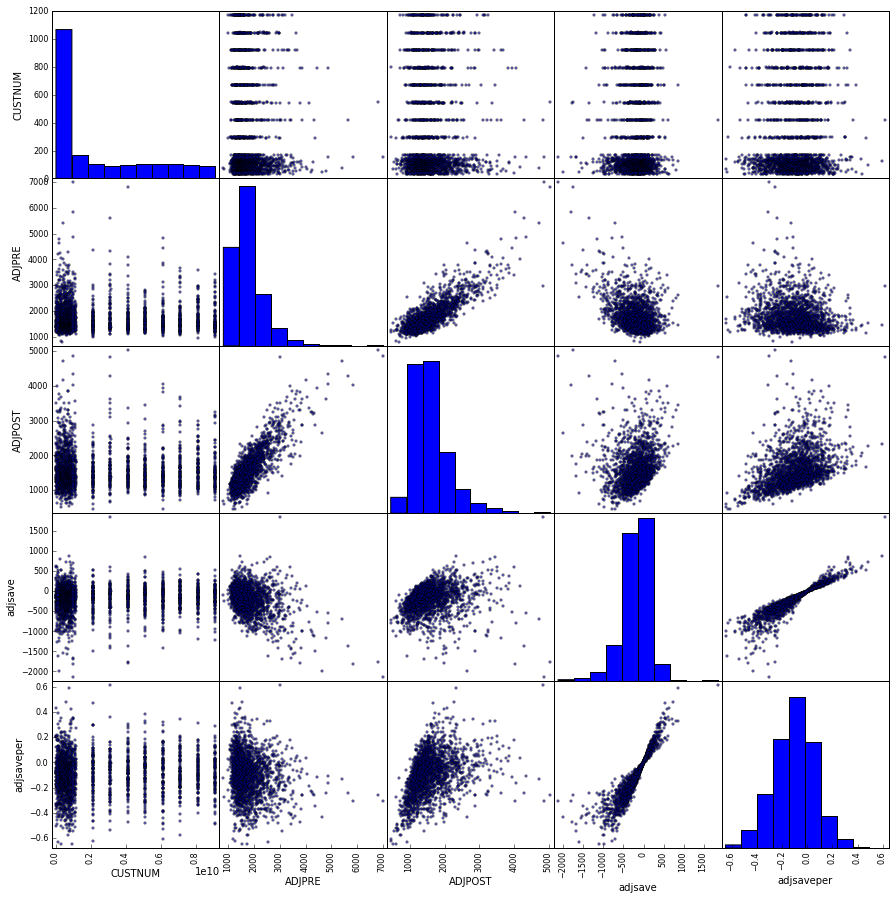

In [118]:
pd.scatter_matrix(save, figsize=(15,15))
print ""

In [115]:
""" check to see if adjpre and adjpost match """

# fix up the adjpre and adjpost first
liurp = liurp_raw[liurp_raw.ADJPRE != 'M']
liurp.ADJPRE = liurp.ADJPRE.map(float)
liurp = liurp[liurp.ADJPOST != 'M']
liurp.ADJPOST = liurp.ADJPOST.map(float)

print "LIURP RAW: ", len(liurp_raw)
print "LIURP ADJ: ", len(liurp)

# remove rows with preusage M
for i in range(1,13):
    col = "PREUSE" + str(i)
    liurp = liurp[liurp[col] != "M"]
print "LIURP PRE: ", len(liurp)

#remove rows with postusage M
for i in range(1,13):
    col = "AFTUSE" + str(i)
    liurp = liurp[liurp[col] != "M"]
print "LIURP POST: ", len(liurp)

#convert pre and post to floats
for i in range(1,13):
    col = "PREUSE" + str(i)
    liurp[col] = liurp[col].map(float)
    col = "AFTUSE" + str(i)
    liurp[col] = liurp[col].map(float)

# sum the annual usage pre and post
liurp['ADJPRE_test'] = liurp[['PREUSE1', 'PREUSE2', 'PREUSE3', 'PREUSE4', 'PREUSE5', 'PREUSE6',
                              'PREUSE7', 'PREUSE8', 'PREUSE9', 'PREUSE10', 'PREUSE11', 'PREUSE12']].sum(axis=1)
liurp['ADJPOST_test']= liurp[['AFTUSE1', 'AFTUSE2', 'AFTUSE3', 'AFTUSE4', 'AFTUSE5', 'AFTUSE6',
                              'AFTUSE7', 'AFTUSE8', 'AFTUSE9', 'AFTUSE10', 'AFTUSE11', 'AFTUSE12']].sum(axis=1)

# create a new savings calc
liurp['adjsave'] = liurp.ADJPRE - liurp.ADJPOST
liurp['adjsave_test'] = liurp.ADJPRE_test - liurp.ADJPOST_test

cols = ['ADJPRE', 'ADJPRE_test', 'ADJPOST', 'ADJPOST_test', 'adjsave', 'adjsave_test']

liurp[cols].describe()

LIURP RAW:  2395
LIURP ADJ:  2019
LIURP PRE:  1655
LIURP POST:  1299


,ADJPRE,ADJPRE_test,ADJPOST,ADJPOST_test,adjsave,adjsave_test
count,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000
mean,1772.249654,1717.742879,1617.753888,1749.023865,154.495766,-31.280985
std,607.901685,562.350167,569.490028,616.037592,316.856530,324.266659
min,844.300000,768.000000,454.500000,423.000000,-868.200000,-1496.000000
25%,1370.350000,1356.000000,1234.850000,1341.500000,-39.200000,-216.000000
50%,1589.900000,1541.000000,1491.800000,1609.000000,114.400000,-47.000000
75%,1992.400000,1915.000000,1859.800000,2013.500000,297.500000,136.000000
max,6992.500000,6910.000000,4864.000000,5124.000000,2128.500000,2064.000000


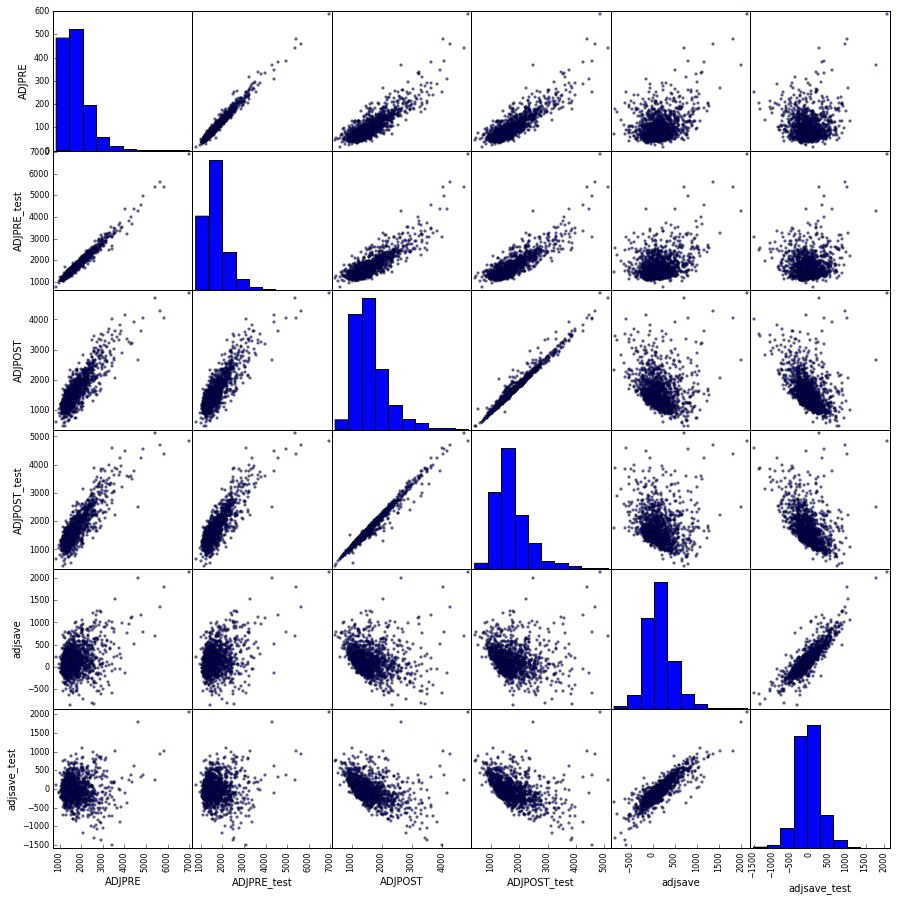

In [119]:
pd.scatter_matrix(liurp[cols], figsize=(15,15))
print ""

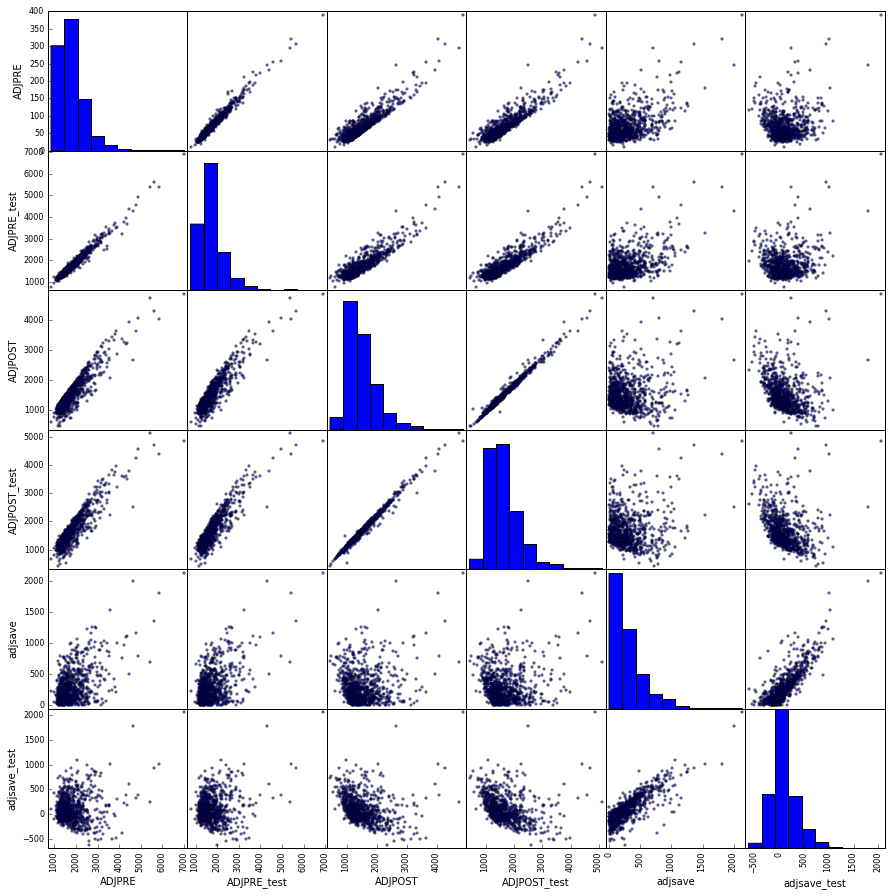

In [208]:
pd.scatter_matrix(liurp[cols][liurp[cols].adjsave > 0], figsize=(15,15))
print ""

## Merge in HeatPre and Contractor Data

In [163]:
# Import ELIRP data
elirp = pd.read_excel("CY2013/All ELIRP cases for LIURP eval.xlsx")
elirp.columns

Index([u'Case Number', u'Contractor', u'Status', u'Customer Acct No', u'Avg Mon Usage', u'Heating Usage', u'Baseload Usage', u'PreHeat Value', u'$ Spent', u'Estimated Gas Savings', u'Last Name', u'Score', u'Inspcted Date', u'Closed Date'], dtype='object')

In [181]:
# get the 2013 closed cases
closed_cases = elirp[(elirp.Status == 'Closed') | (elirp.Status == "Closed: Limited Only")]
closed_cases['yr'] = closed_cases['Closed Date'].apply(lambda x: int(str(x)[0:4]))
cases2013 = closed_cases[closed_cases.yr == 2013]
len(cases2013['Customer Acct No'].unique())

2390

In [201]:
# cast the customer number as an int and merge
save.CUSTNUM = tmp.CUSTNUM.map(int)
print "PRE:", len(save)
s2 = pd.merge(save, cases2013, how='inner', left_on=['CUSTNUM'], right_on=['Customer Acct No'])
s2.describe()

PRE: 2019


,CUSTNUM,ADJPRE,ADJPOST,adjsave,adjsaveper,Customer Acct No,Avg Mon Usage,Heating Usage,Baseload Usage,PreHeat Value,$ Spent,Estimated Gas Savings,Score,yr
count,2.012000e+03,2012.000000,2012.000000,2012.000000,2012.000000,2.012000e+03,2012.000000,2012.000000,2012.000000,2012.000000,2012.000000,2012.000000,2.000000,2012
mean,2.498025e+09,1788.458499,1594.411034,-194.047465,-0.099627,2.498025e+09,0.094518,159.072127,30.738529,189.810656,2344.060229,27.957753,97.000000,2013
std,2.845367e+09,598.543381,555.005644,336.025941,0.166386,2.845367e+09,3.750364,51.909570,18.925758,63.180964,2476.392900,46.535237,4.242641,0
min,3.728850e+05,802.000000,454.500000,-2128.500000,-0.648932,3.728850e+05,0.000000,74.420000,0.000000,83.930000,58.370000,0.000000,94.000000,2013
25%,4.500081e+08,1396.000000,1232.625000,-357.850000,-0.203920,4.500081e+08,0.000000,123.032500,18.447500,147.815000,322.260000,10.000000,95.500000,2013
50%,8.633213e+08,1619.500000,1468.050000,-153.400000,-0.092063,8.633213e+08,0.000000,143.550000,27.860000,171.170000,1480.470000,22.000000,97.000000,2013
75%,4.119613e+09,1999.675000,1825.625000,9.625000,0.006864,4.119613e+09,0.000000,180.152500,38.290000,212.472500,3132.930000,37.000000,98.500000,2013
max,9.122163e+09,6992.500000,5035.100000,1846.400000,0.617918,9.122163e+09,168.170000,568.310000,227.260000,775.200000,13429.770000,1440.000000,100.000000,2013


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11a0b08d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11cd36f10>]], dtype=object)

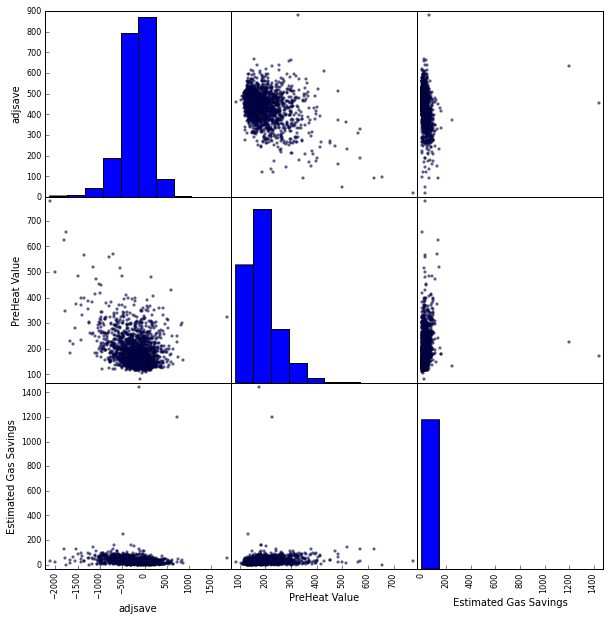

In [205]:
pd.scatter_matrix(s2[['adjsave','PreHeat Value', 'Estimated Gas Savings']], figsize=(10,10))

In [210]:
s2.groupby(['Contractor']).describe()

$ Spent      ADJPOST       ADJPRE  Avg Mon Usage  \
Contractor                                                                
CMC        count    349.000000   349.000000   349.000000     349.000000   
           mean    1996.743123  1559.193410  1742.461318       0.002865   
           std     2407.977294   462.700510   481.644604       0.053529   
           min       76.240000   612.200000   844.300000       0.000000   
           25%      223.250000  1267.500000  1414.400000       0.000000   
           50%     1116.290000  1472.600000  1605.000000       0.000000   
           75%     2520.670000  1781.200000  1932.000000       0.000000   
           max    10847.840000  3303.500000  4358.700000       1.000000   
ECA        count    535.000000   535.000000   535.000000     535.000000   
           mean    2287.617533  1430.725794  1658.961869       0.347981   
           std     2588.859788   442.049869   471.815335       7.271406   
           min      124.040000   454.500000  1000.400000       0.000000   
           25%      230.710000  1176.650000  1359.600000       0.000000   
           50%      280.490000  1354.000000  1524.100000       0.000000   
           75%     4444.355000  1596.400000  1790.000000       0.000000   
           max    10336.920000  4834.500000  4789.500000     168.170000   
MARKGROUP  count   1128.000000  1128.000000  1128.000000    1128.000000   
           mean    2478.289406  1682.941667  1864.108954       0.002660   
           std     2433.056526   608.277048   669.185134       0.051525   
           min       58.370000   469.400000   802.000000       0.000000   
           25%      860.015000  1274.425000  1409.600000       0.000000   
           50%     1699.100000  1546.200000  1675.850000       0.000000   
           75%     2949.220000  1954.075000  2122.850000       0.000000   
           max    13429.770000  5035.100000  6992.500000       1.000000   

                  Baseload Usage       CUSTNUM  Customer Acct No  \
Contractor                                                         
CMC        count      349.000000  3.490000e+02      3.490000e+02   
           mean        30.884871  2.833968e+09      2.833968e+09   
           std         17.096908  2.946179e+09      2.946179e+09   
           min          0.800000  2.666975e+06      2.666975e+06   
           25%         20.470000  5.273660e+08      5.273660e+08   
           50%         28.980000  9.436048e+08      9.436048e+08   
           75%         37.720000  5.117276e+09      5.117276e+09   
           max        175.090000  9.122163e+09      9.122163e+09   
ECA        count      535.000000  5.350000e+02      5.350000e+02   
           mean        28.005252  2.274716e+09      2.274716e+09   
           std         14.874887  2.749858e+09      2.749858e+09   
           min          0.000000  3.728850e+05      3.728850e+05   
           25%         17.635000  3.840786e+08      3.840786e+08   
           50%         26.160000  8.171782e+08      8.171782e+08   
           75%         36.550000  4.112309e+09      4.112309e+09   
           max         91.730000  9.122019e+09      9.122019e+09   
MARKGROUP  count     1128.000000  1.128000e+03      1.128000e+03   
           mean        31.989619  2.499999e+09      2.499999e+09   
           std         20.950417  2.850399e+09      2.850399e+09   
           min          0.330000  1.164849e+06      1.164849e+06   
           25%         18.157500  4.584006e+08      4.584006e+08   
           50%         28.545000  8.741554e+08      8.741554e+08   
           75%         39.997500  4.117299e+09      4.117299e+09   
           max        227.260000  9.120152e+09      9.120152e+09   

                  Estimated Gas Savings  Heating Usage  PreHeat Value  \
Contractor                                                              
CMC        count             349.000000     349.000000     349.000000   
           mean               26.822350     154.191891     185.076762   
           

## Raw Usage Exploration

In [211]:
bills = pd.read_csv('CY2013/Usage and Source Data/2013 cases/Updated_az_elirp_2013_bills.csv')

In [212]:
bills.head()

,CASE_ID,ACCOUNT_ID,PREMISE_ID,BILL_END_DT,REV_MONTH,USAGE_QTY,READ_CODE,DAYS_IN_BILL_PER,TOT_SUPPLY_AMT,TOT_DELIVERY_AMT,AMT_BILL_SEG,CRP_MONTH_AMOUNT,STATE_TAX_AMT,SR_DISC_AMT,CRP_DISC_AMT,CRP_REVRDISC_AMT,SA_ID,CRP_FORGIVE_AMT,SEG_END_DT
0,11BE05980,1112046678,9994855966,20120104,201201,221,R,33,138.73,232.18,96.40,96.40,0,0,-274.51,0,9961284697,NaN,20120104
1,12BE00967,7112526528,9994903952,20120106,201201,306,R,31,192.09,310.21,60.66,60.66,0,0,-441.64,0,9961251121,NaN,20120106
2,13AE07282,2112636995,9994915167,20120106,201201,228,R,31,143.13,233.86,77.49,77.49,0,0,-299.50,0,9961299543,NaN,20120106
3,12CE02634,1113243463,9994941307,20120110,201201,307,R,34,192.72,311.53,504.25,276.00,0,0,0.00,0,5057495440,NaN,20120109
4,13BE02911,211258967,9995138166,20120118,201201,175,R,34,109.86,184.53,76.95,76.95,0,0,-217.44,0,3552935622,NaN,20120118


## Moving Everthing back one month

In [213]:
""" check to see if adjpre and adjpost match """

# fix up the adjpre and adjpost first
liurp = liurp_raw[liurp_raw.ADJPRE != 'M']
liurp.ADJPRE = liurp.ADJPRE.map(float)
liurp = liurp[liurp.ADJPOST != 'M']
liurp.ADJPOST = liurp.ADJPOST.map(float)

print "LIURP RAW: ", len(liurp_raw)
print "LIURP ADJ: ", len(liurp)

# remove rows with preusage M
for i in range(1,13):
    col = "PREUSE" + str(i)
    liurp = liurp[liurp[col] != "M"]
print "LIURP PRE: ", len(liurp)

#remove rows with postusage M
for i in range(1,13):
    col = "AFTUSE" + str(i)
    liurp = liurp[liurp[col] != "M"]
print "LIURP POST: ", len(liurp)

#convert pre and post to floats
for i in range(1,13):
    col = "PREUSE" + str(i)
    liurp[col] = liurp[col].map(float)
    col = "AFTUSE" + str(i)
    liurp[col] = liurp[col].map(float)

# sum the annual usage pre and post
liurp['ADJPRE_test'] = liurp[['PREUSE1', 'PREUSE2', 'PREUSE3', 'PREUSE4', 'PREUSE5', 'PREUSE6',
                              'PREUSE7', 'PREUSE8', 'PREUSE9', 'PREUSE10', 'PREUSE11', ]].sum(axis=1) / 11 * 12
liurp['ADJPOST_test']= liurp[['AFTUSE1', 'AFTUSE2', 'AFTUSE3', 'AFTUSE4', 'AFTUSE5', 'AFTUSE6',
                              'AFTUSE7', 'AFTUSE8', 'AFTUSE9', 'AFTUSE10', 'AFTUSE11', 'PREUSE12']].sum(axis=1)

# create a new savings calc
liurp['adjsave'] = liurp.ADJPRE - liurp.ADJPOST
liurp['adjsave_test'] = liurp.ADJPRE_test - liurp.ADJPOST_test

cols = ['ADJPRE', 'ADJPRE_test', 'ADJPOST', 'ADJPOST_test', 'adjsave', 'adjsave_test']

liurp[cols].describe()

LIURP RAW:  2395
LIURP ADJ:  2019
LIURP PRE:  1655
LIURP POST:  1299


,ADJPRE,ADJPRE_test,ADJPOST,ADJPOST_test,adjsave,adjsave_test
count,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000
mean,1772.249654,1666.280915,1617.753888,1876.218630,154.495766,-209.937714
std,607.901685,512.290017,569.490028,705.477525,316.856530,450.850185
min,844.300000,678.545455,454.500000,511.000000,-868.200000,-2361.636364
25%,1370.350000,1337.454545,1234.850000,1408.500000,-39.200000,-493.045455
50%,1589.900000,1552.363636,1491.800000,1687.000000,114.400000,-153.818182
75%,1992.400000,1842.000000,1859.800000,2174.000000,297.500000,102.590909
max,6992.500000,6290.181818,4864.000000,5908.000000,2128.500000,1082.000000


In [214]:
""" check to see if adjpre and adjpost match """

# fix up the adjpre and adjpost first
liurp = liurp_raw[liurp_raw.ADJPRE != 'M']
liurp.ADJPRE = liurp.ADJPRE.map(float)
liurp = liurp[liurp.ADJPOST != 'M']
liurp.ADJPOST = liurp.ADJPOST.map(float)

print "LIURP RAW: ", len(liurp_raw)
print "LIURP ADJ: ", len(liurp)

# remove rows with preusage M
for i in range(1,13):
    col = "PREUSE" + str(i)
    liurp = liurp[liurp[col] != "M"]
print "LIURP PRE: ", len(liurp)

#remove rows with postusage M
for i in range(1,13):
    col = "AFTUSE" + str(i)
    liurp = liurp[liurp[col] != "M"]
print "LIURP POST: ", len(liurp)

#convert pre and post to floats
for i in range(1,13):
    col = "PREUSE" + str(i)
    liurp[col] = liurp[col].map(float)
    col = "AFTUSE" + str(i)
    liurp[col] = liurp[col].map(float)

# sum the annual usage pre and post
liurp['ADJPRE_test'] = liurp[['PREUSE1', 'PREUSE2', 'PREUSE3', 'PREUSE4', 'PREUSE5', 'PREUSE6',
                              'PREUSE7', 'PREUSE8', 'PREUSE9', 'PREUSE10', ]].sum(axis=1) / 10 * 12
liurp['ADJPOST_test']= liurp[['AFTUSE1', 'AFTUSE2', 'AFTUSE3', 'AFTUSE4', 'AFTUSE5', 'AFTUSE6',
                              'AFTUSE7', 'AFTUSE8', 'AFTUSE9', 'AFTUSE10', 'PREUSE11', 'PREUSE12']].sum(axis=1)

# create a new savings calc
liurp['adjsave'] = liurp.ADJPRE - liurp.ADJPOST
liurp['adjsave_test'] = liurp.ADJPRE_test - liurp.ADJPOST_test

cols = ['ADJPRE', 'ADJPRE_test', 'ADJPOST', 'ADJPOST_test', 'adjsave', 'adjsave_test']

liurp[cols].describe()

LIURP RAW:  2395
LIURP ADJ:  2019
LIURP PRE:  1655
LIURP POST:  1299


,ADJPRE,ADJPRE_test,ADJPOST,ADJPOST_test,adjsave,adjsave_test
count,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000
mean,1772.249654,1567.862356,1617.753888,2012.688992,154.495766,-444.826636
std,607.901685,498.418165,569.490028,780.878471,316.856530,661.366173
min,844.300000,603.600000,454.500000,635.000000,-868.200000,-3021.200000
25%,1370.350000,1236.000000,1234.850000,1502.500000,-39.200000,-862.500000
50%,1589.900000,1504.800000,1491.800000,1796.000000,114.400000,-431.400000
75%,1992.400000,1767.600000,1859.800000,2332.500000,297.500000,69.900000
max,6992.500000,5624.400000,4864.000000,6583.000000,2128.500000,1427.400000


In [215]:
""" check to see if adjpre and adjpost match """

# fix up the adjpre and adjpost first
liurp = liurp_raw[liurp_raw.ADJPRE != 'M']
liurp.ADJPRE = liurp.ADJPRE.map(float)
liurp = liurp[liurp.ADJPOST != 'M']
liurp.ADJPOST = liurp.ADJPOST.map(float)

print "LIURP RAW: ", len(liurp_raw)
print "LIURP ADJ: ", len(liurp)

# remove rows with preusage M
for i in range(1,13):
    col = "PREUSE" + str(i)
    liurp = liurp[liurp[col] != "M"]
print "LIURP PRE: ", len(liurp)

#remove rows with postusage M
for i in range(1,13):
    col = "AFTUSE" + str(i)
    liurp = liurp[liurp[col] != "M"]
print "LIURP POST: ", len(liurp)

#convert pre and post to floats
for i in range(1,13):
    col = "PREUSE" + str(i)
    liurp[col] = liurp[col].map(float)
    col = "AFTUSE" + str(i)
    liurp[col] = liurp[col].map(float)

# sum the annual usage pre and post
liurp['ADJPRE_test'] = liurp[['AFTUSE1', 'PREUSE2', 'PREUSE3', 'PREUSE4', 'PREUSE5', 'PREUSE6',
                              'PREUSE7', 'PREUSE8', 'PREUSE9', 'PREUSE10', 'PREUSE11', 'PREUSE12']].sum(axis=1)
liurp['ADJPOST_test']= liurp[['AFTUSE2', 'AFTUSE3', 'AFTUSE4', 'AFTUSE5', 'AFTUSE6',
                              'AFTUSE7', 'AFTUSE8', 'AFTUSE9', 'AFTUSE10', 'AFTUSE11', 'AFTUSE12']].sum(axis=1) / 11 * 12

# create a new savings calc
liurp['adjsave'] = liurp.ADJPRE - liurp.ADJPOST
liurp['adjsave_test'] = liurp.ADJPRE_test - liurp.ADJPOST_test

cols = ['ADJPRE', 'ADJPRE_test', 'ADJPOST', 'ADJPOST_test', 'adjsave', 'adjsave_test']

liurp[cols].describe()

LIURP RAW:  2395
LIURP ADJ:  2019
LIURP PRE:  1655
LIURP POST:  1299


,ADJPRE,ADJPRE_test,ADJPOST,ADJPOST_test,adjsave,adjsave_test
count,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000
mean,1772.249654,1667.354888,1617.753888,1835.983204,154.495766,-168.628315
std,607.901685,524.440616,569.490028,665.264241,316.856530,414.072435
min,844.300000,542.000000,454.500000,439.636364,-868.200000,-1920.545455
25%,1370.350000,1326.500000,1234.850000,1396.363636,-39.200000,-407.681818
50%,1589.900000,1538.000000,1491.800000,1675.636364,114.400000,-160.818182
75%,1992.400000,1850.500000,1859.800000,2108.727273,297.500000,112.272727
max,6992.500000,6281.000000,4864.000000,5539.636364,2128.500000,1413.181818


# LIURP 2012

In [228]:
# LIURP File Import
#import liurp_fields
reload(liurp_fields)
colspecs = liurp_fields.colspecs
colnames = liurp_fields.colnames
liurp_2012 = pd.read_fwf("CY2012/PGWLIURP2012.txt", colspecs=colspecs, header=None, names=colnames)
liurp_2012.iloc[:, 0:285].head()

,COMPANY,YEAR,CUSTNUM,ZIPCODE,COUNTY,MCD,SERTYPEB,CLASS,PREUSE1,PREUSE2,...,TOTBFR,TOTDCA,TOTOTHR,TERMPRE,BLANK,TERMPOS,PAYPRE,PAYPOST,PILOT,CONTRACT
0,76,2012,100073509,19121,101,5,1,1,320,230,...,M,M,M,NaN,M,M,384,345,4,004
1,76,2012,100318737,19145,101,5,1,1,10,46,...,M,M,M,NaN,M,M,M,M,4,001
2,76,2012,100356954,19131,101,5,1,1,12,25,...,M,M,M,NaN,M,M,1408,1267,4,001
3,76,2012,100753007,19126,101,5,1,1,M,M,...,M,M,M,NaN,M,M,M,M,4,003
4,76,2012,100870997,19132,101,5,1,1,340,266,...,M,M,M,NaN,M,M,M,M,4,003


In [229]:
""" check to see if adjpre and adjpost match """

# fix up the adjpre and adjpost first
liurp = liurp_2012[liurp_2012.ADJPRE != 'M']
liurp.ADJPRE = liurp.ADJPRE.map(float)
liurp = liurp[liurp.ADJPOST != 'M']
liurp.ADJPOST = liurp.ADJPOST.map(float)

print "LIURP RAW: ", len(liurp_raw)
print "LIURP ADJ: ", len(liurp)

# remove rows with preusage M
for i in range(1,13):
    col = "PREUSE" + str(i)
    liurp = liurp[liurp[col] != "M"]
print "LIURP PRE: ", len(liurp)

#remove rows with postusage M
for i in range(1,13):
    col = "AFTUSE" + str(i)
    liurp = liurp[liurp[col] != "M"]
print "LIURP POST: ", len(liurp)

#convert pre and post to floats
for i in range(1,13):
    col = "PREUSE" + str(i)
    liurp[col] = liurp[col].map(float)
    col = "AFTUSE" + str(i)
    liurp[col] = liurp[col].map(float)

# sum the annual usage pre and post
liurp['ADJPRE_test'] = liurp[['PREUSE1', 'PREUSE2', 'PREUSE3', 'PREUSE4', 'PREUSE5', 'PREUSE6',
                              'PREUSE7', 'PREUSE8', 'PREUSE9', 'PREUSE10', 'PREUSE11', 'PREUSE12']].sum(axis=1)
liurp['ADJPOST_test']= liurp[['AFTUSE1', 'AFTUSE2', 'AFTUSE3', 'AFTUSE4', 'AFTUSE5', 'AFTUSE6',
                              'AFTUSE7', 'AFTUSE8', 'AFTUSE9', 'AFTUSE10', 'AFTUSE11', 'AFTUSE12']].sum(axis=1)

# create a new savings calc
liurp['adjsave'] = liurp.ADJPRE - liurp.ADJPOST
liurp['adjsave_test'] = liurp.ADJPRE_test - liurp.ADJPOST_test

cols = ['ADJPRE', 'ADJPRE_test', 'ADJPOST', 'ADJPOST_test', 'adjsave', 'adjsave_test']

liurp[cols].describe()

LIURP RAW:  2395
LIURP ADJ:  1535
LIURP PRE:  507
LIURP POST:  275


,ADJPRE,ADJPRE_test,ADJPOST,ADJPOST_test,adjsave,adjsave_test
count,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000
mean,1739.054545,1533.061818,1574.935273,1560.850909,164.119273,-27.789091
std,495.933194,415.831100,491.458655,485.679886,306.912874,287.860417
min,654.200000,647.000000,628.900000,601.000000,-836.900000,-1125.000000
25%,1423.450000,1254.500000,1239.700000,1225.500000,-16.750000,-206.500000
50%,1686.800000,1482.000000,1533.300000,1510.000000,135.900000,-71.000000
75%,1954.550000,1712.000000,1831.800000,1830.500000,309.200000,131.000000
max,4334.100000,3757.000000,3737.200000,4119.000000,1495.200000,1089.000000


In [235]:
cols = ['ADJPRE', 'EXADJPRE', 'ADJPOST', 'EXADJPOS']

ldp = liurp_2012[liurp_2012.ADJPRE != 'M']

for i in cols:
    ldp[i] = ldp[i].map(float)

ldp[cols].describe()

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:6: SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index,col_indexer] = value instead


,ADJPRE,EXADJPRE,ADJPOST,EXADJPOS
count,1535.000000,1535,1535.000000,1535
mean,1884.787948,1,1531.362280,1
std,576.473255,0,482.287213,0
min,654.200000,1,454.700000,1
25%,1539.300000,1,1220.500000,1
50%,1754.600000,1,1462.800000,1
75%,2063.400000,1,1751.600000,1
max,7016.800000,1,6135.900000,1


/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index,col_indexer] = value instead
  if __name__ == '__main__':


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11ca59610>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x126f52f90>]], dtype=object)

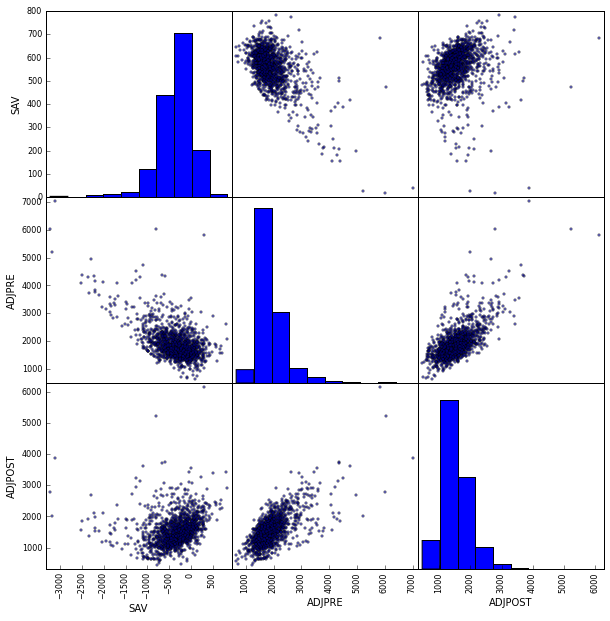

In [243]:
ldp['SAV'] = ldp.ADJPOST - ldp.ADJPRE
pd.scatter_matrix(ldp[['SAV', 'ADJPRE', 'ADJPOST']], figsize=(10,10))

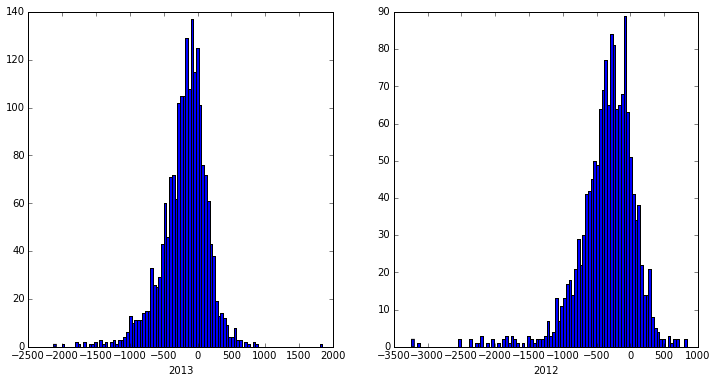

In [246]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.hist(save.adjsave, bins=100)
plt.xlabel('2013')
plt.subplot(122)
plt.hist(ldp.SAV, bins=100)
plt.xlabel('2012')
plt.show()

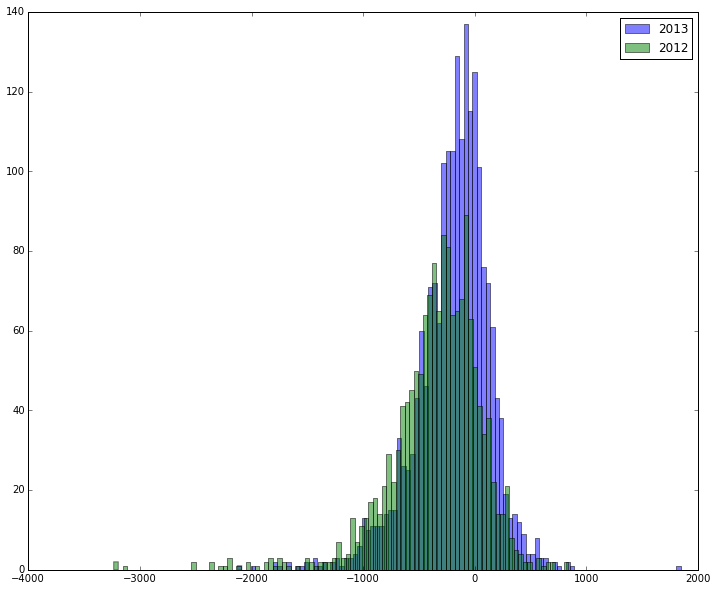

In [250]:
plt.figure(figsize=(12,10))
plt.hist(save.adjsave, bins=100, label='2013', alpha=0.5)
plt.hist(ldp.SAV, bins=100, label='2012', alpha=0.5)
plt.legend(loc='upper right')
plt.show()